# TP Coding Convolutional Neural Networks in tensorflow and keras

For any remark or suggestion, please feel free to contact me at:
geoffroy.peeters@telecom-paristech.fr

Last edit: 2018/12/14 geoffroy.peeters@telecom-paristech.fr

### Objective:

We want to implement a Convolutional Neural Network (CNN) to do image recognition. For this we will use the well-known CIFAR-10 dataset https://www.cs.toronto.edu/~kriz/cifar.html.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

We will first code the simple ConvNet described below using tensorflow https://www.tensorflow.org envirronment, then do the same using keras https://keras.io.

- The input of the CNN is a set of (32,32,3) image tensors.
- We apply 
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - a ReLu activation function
    - a Convolutional layer of 32 filters of shape (3,3), with stride (1,1) and padding='same' (i.e. we do not apply zero-padding)
    - a ReLu activation function
    - a Max Pooling Layer of shape (2,2) and stride (2,2à (i.e. we reduce by two the size in each dimension)
    - We then Flatten the data (reduce them to a vector in order to be able to apply a Fully-Connected layer to it)
    - A softmax activation function which outputs are the $P(y_c | X)$ (multi-class problem)


<IMG SRC='./TP02_CNN_partA.png'>

### Your task:
You need to add the missing parts in the code (parts between # --- START CODE HERE and # --- END CODE HERE)

# Load packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Import data

We first import CIFAR-10 dataset.

In [2]:
from keras.utils.np_utils import to_categorical

from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_train))

Using TensorFlow backend.


(50000, 32, 32, 3)
(10000, 32, 32, 3)
[0 1 2 3 4 5 6 7 8 9]


The CIFAR-10 dataset has 10 classes. These are the following :

In [3]:
cifar_10_list = [ 'airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### Display some of the images

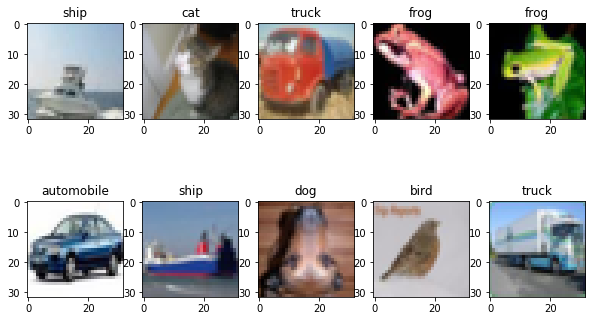

In [4]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(X_train[i, :, :, :])
    plt.title(cifar_10_list[int(y_train[i])])

## Format conversion

We now convert the format of the data. In the case of CNNs, and contrary to MLPs, the inputs are not simply vectors of arbitrary size. For example, in the case of images, it is important to distinguish the different dimensions (otherwise the network would not know how to carry out convolutions). Therefore, you need to carry out the following operation :

- reshape the input ```X_train```and ```X_test``` to a set of matrices of size (32,32) and depth 3 (for the 3 R,G,B colors), convert the data to float32 and normalize them in the range [0,1]. The final dimensions of the image data should be : [batch_size, height, width, n_channels]

Furthermore, as in the previous lab work, you must also convert the label vectors to matrices with k columns, where k is the number of classes. This allows us to carry out the cross-entropy for multi-class problems. Therefore :

- convert the output label ```y_train``` and ```y_test``` to one-hot encoding format.

In [5]:
# input image dimensions
img_rows, img_cols, nb_channels = 32, 32, 3
nb_classes = 10

# In case depth is 1 (black and white pictures) -> reshape to proper format
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, nb_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, nb_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('Y_train shape:', Y_train.shape)
print('There is {} train data'.format(X_train.shape[0]))
print('There is {} test data'.format(X_test.shape[0]))
print(img_rows, img_cols, nb_channels)

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
Y_train shape: (50000, 10)
There is 50000 train data
There is 10000 test data
32 32 3


# 1. CNN with tensorflow

We are now going to create a CNN with Tensorflow, and train it on the previously loaded CIFAR dataset.
- First define the input and output using ```tf.placeholder```
- Define the weights W1,b1,W2,b2 of the CNN using ```tf.get_variable```
    - We initialize them using ```tf.contrib.layers.xavier_initializer```(see https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer)
- Perform the convolution using ```tf.nn.conv2d``` 
- Apply the activation function using ```tf.nn.relu```
- Perform the max pooling using ```tf.nn.max_pool```
- Flatten the output of the convolution using ```tf.contrib.layers.flatten```
- Perform the Fully-Connected part using ```tf.contrib.layers.fully_connected```

Also, note that in Tensorflow, you can carry out the softmax + cross entropy all in one step with the following function :

- ```tf.nn.softmax_cross_entropy_with_logits()```

This has the advantage of being optimised and stabilised by the programmers who wrote Tensorflow, so that you do not have numerical problems.

In [6]:
import tensorflow as tf

learning_rate = 0.01
n_epochs = 20
batch_size = 64

# number of convolutional filters to use
nb_filters = 32
# convolution kernel size
kernel_size = (3, 3)
# size of pooling area for max pooling
pool_size = (2, 2)


# --- Size of the successice layers
n_h_0 = nb_channels
n_h_1 = nb_filters
n_h_2 = nb_filters

In [8]:
tf.reset_default_graph()

# input tensor are of shape [batch, in_height, in_width, in_channels]  
# filter / kernel tensor are of shape [filter_height, filter_width, in_channels, out_channels]


# --- START CODE HERE
X_input = tf.placeholder(tf.float32, [None, 32, 32, 3])
Y_output = tf.placeholder(tf.float32, [None, 10])

W1 = tf.get_variable('W1',shape=( kernel_size[0], kernel_size[1], n_h_0, n_h_1), initializer=tf.contrib.layers.xavier_initializer())
b1 = tf.get_variable('b1',shape=(n_h_1), initializer=tf.contrib.layers.xavier_initializer())
h_covn1 = tf.nn.relu(tf.nn.conv2d(X_input, W1, strides=[1, 1, 1, 1], padding='SAME') + b1)                   #output size = 32,32,32
h_pool1 = tf.nn.max_pool(h_covn1, ksize=[1,pool_size[0],pool_size[1],1], strides=[1,2,2,1], padding='SAME')  #output size = 16,16,32

W2 = tf.get_variable('W2',shape=(kernel_size[0], kernel_size[1], n_h_1, n_h_2), initializer=tf.contrib.layers.xavier_initializer())
b2 = tf.get_variable('b2',shape=(n_h_2), initializer=tf.contrib.layers.xavier_initializer())
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_pool1, W2, strides=[1, 1, 1, 1], padding='SAME') + b2)                   #output size = 16,16,32
h_pool2 = tf.nn.max_pool(h_covn1, ksize=[1,pool_size[0],pool_size[1],1], strides=[1,2,2,1], padding='SAME')  #output size = 8,8,32

h_pool2_flat = tf.contrib.layers.flatten(h_pool2)
Z3 = tf.contrib.layers.fully_connected(h_pool2_flat,10)
# --- END CODE HERE


cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Z3, labels = Y_output))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Train the model

Cost after epoch 0: 2.255074
Cost after epoch 1: 2.189029
Cost after epoch 2: 2.110142
Cost after epoch 3: 2.021364
Cost after epoch 4: 1.978665
Cost after epoch 5: 1.959701
Cost after epoch 6: 1.947676
Cost after epoch 7: 1.945384
Cost after epoch 8: 1.940441
Cost after epoch 9: 1.935104
Cost after epoch 10: 1.932557
Cost after epoch 11: 1.926424
Cost after epoch 12: 1.932841
Cost after epoch 13: 1.925212
Cost after epoch 14: 1.920868
Cost after epoch 15: 1.918781
Cost after epoch 16: 1.931623
Cost after epoch 17: 1.929714
Cost after epoch 18: 1.931715
Cost after epoch 19: 1.931032


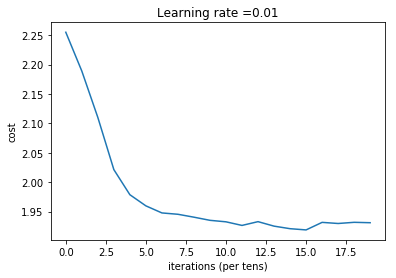

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.2972
Test Accuracy: 0.2718


In [9]:
init = tf.global_variables_initializer()
n_batches = int(np.ceil(X_train.shape[0] / float(batch_size)))
costs = []

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        minibatch_cost = 0.
        for batch_idx in range(n_batches):
            start = batch_idx * batch_size
            stop = start + batch_size
            _ , temp_cost = sess.run([optimizer, cost], feed_dict={X_input: X_train[start: stop,:,:,:], Y_output: Y_train[start: stop,:]})
            minibatch_cost += temp_cost / n_batches

        if epoch % 1 == 0:
            print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            
        costs.append(minibatch_cost) 
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y_output, 1))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X_input: X_train, Y_output: Y_train})
    test_accuracy = accuracy.eval({X_input: X_test, Y_output: Y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    


# 2. CNN with keras

We are now going to create the same network with Keras. As we shall see, the interfance is quite simplified in comparison to Tensorflow.

## We first import keras packages

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
print(keras.__version__)

2.2.4


## We define the parameters of the model, and of the training

In [11]:
input_shape = (img_rows, img_cols, nb_channels)

## Create the CNN model in Keras using the Sequential API

Keras has a simple way of adding layers to create a neural network. First, you can indicate to Keras that the model is 'sequential', that is to say, a straight-forward CNN. For this, you can use the following function :
- ```model = Sequential()```

After this, you can add layers with the function.

- ```model.add()```

You can then use the ```Conv2D```, ```Activation```, ```MaxPooling2D```, ```Flatten``` and ```Dense``` (fully connected) functions to specify different layer types.

Create your CNN now with the network parameters specified above.

In [19]:
# --- START CODE HERE
kernel_size_x = 3
kernel_size_y = 3
nb_calsses = 10


model = Sequential()
model.add(Conv2D(nb_filters, kernel_size_x, kernel_size_y, border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(nb_filters, kernel_size_x, kernel_size_y))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(nb_classes))
model.add(Activation('softmax'))


# --- END CODE HERE

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  if sys.path[0] == '':


## Compile the model

We define here the ```loss``` that we will minimize and the ```optimizer``` (the specific algorithm used to perform gradient descent).

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

## We display a summary of the model created (but not yet trained)

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
__________

## Perform the training

In [22]:
n_train_samples = 10000
model.fit(X_train[:n_train_samples], Y_train[:n_train_samples],
          batch_size=batch_size, 
          nb_epoch=n_epochs,
          verbose=1, 
          validation_data=(X_test, Y_test))

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 10000 samples, validate on 10000 samples
Epoch 1/20
10000/10000 [==============================] - 23s 2ms/step - loss: 2.2369 - acc: 0.1670 - val_loss: 2.1372 - val_acc: 0.2351
Epoch 2/20
10000/10000 [==============================] - 22s 2ms/step - loss: 2.0521 - acc: 0.2763 - val_loss: 1.9659 - val_acc: 0.3016
Epoch 3/20
10000/10000 [==============================] - 21s 2ms/step - loss: 1.8854 - acc: 0.3371 - val_loss: 1.7651 - val_acc: 0.3781
Epoch 4/20
10000/10000 [==============================] - 22s 2ms/step - loss: 1.7768 - acc: 0.3699 - val_loss: 1.6713 - val_acc: 0.4048
Epoch 5/20
10000/10000 [==============================] - 22s 2ms/step - loss: 1.7300 - acc: 0.3876 - val_loss: 1.7201 - val_acc: 0.3935
Epoch 6/20
10000/10000 [==============================] - 22s 2ms/step - loss: 1.6936 - acc: 0.3887 - val_loss: 1.7086 - val_acc: 0.3933
Epoch 7/20
10000/10000 [==============================] - 22s 2ms/step - loss: 1.6467 - acc: 0.4097 - val_loss: 1.6468 - val_acc

## We evaluate the performances of the model on the test data

In [23]:
score = model.evaluate(X_test, Y_test, verbose=False)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 1.5602315362930297
Test accuracy: 0.4363


Let's take a look at what the network has learned. What do you think ?

After adding the Dropout() function, the result is improved, because it can prevent overfitting. 

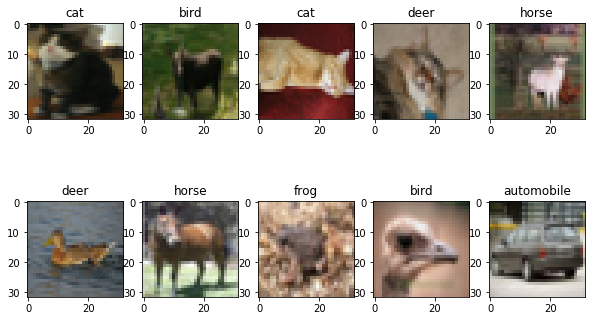

In [24]:
plt.figure(figsize=(10, 6))
for idx,i in enumerate(range(100,110)):
    plt.subplot(2, 5, idx+1)
    rand_ind = np.random.randint(0,X_test.shape[0])
    predicted_class = np.argmax(np.squeeze(model.predict(np.expand_dims(X_test[rand_ind,:,:,:],axis=0))))
    plt.imshow(X_test[rand_ind,:,:,:])
    plt.title(cifar_10_list[int(predicted_class)])

## We display all (32) trained filters of the first layer

32
(3, 3)
(3, 3, 3, 32)


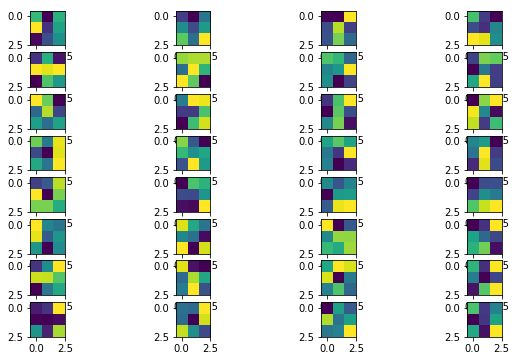

In [39]:
print(model.layers[0].filters)
print(model.layers[0].kernel_size)
print(model.layers[0].get_weights()[0].shape)
plt.figure(figsize=(10, 6))
for num in range(0,32):
    plt.subplot(8, 4, num+1)
    # --- START CODE HERE
    plt.imshow(model.layers[0].get_weights()[0][:,:,0,num]*255)
    # --- END CODE HERE    